In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from math import sqrt

# Линейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + a\frac{\partial f}{\partial x} = 0, a > 0 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [48]:
a = 1    # > 0
f1 = 10

dx = 0.01
dt = 0.006

N = 300
T = 600

In [49]:
def getPrecise(t):
    res = np.zeros(N)
    max_i = int(a*t/dx)+1
    if max_i > N:
        max_i = N
    for i in range(max_i):
        res[i] = f1
        
    return res

In [50]:
sigma = a*dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  0.6


### Схема "явный левый уголок"

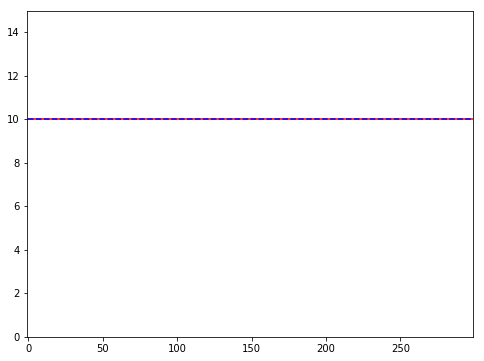

In [56]:
A = np.zeros((T,N))

for n in range(-1, T-1):
    A[n+1][0] = f1
    for i in range(1, N-1):
        A[n+1][i] = A[n][i] - sigma*(A[n][i]-A[n][i-1])
    A[n+1][N-1] = A[n+1][N-2]

fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'b', linestyle = '--')

frame_const = 2

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    ax.grid(True)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = A[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

### ENO схема

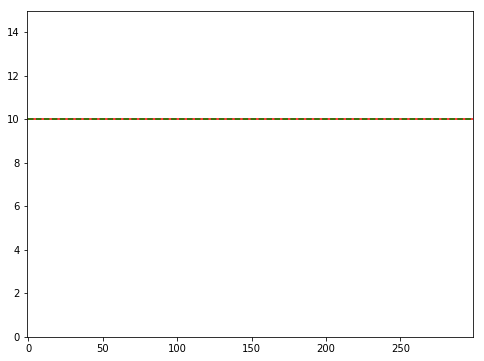

In [57]:
C = sigma

B = np.zeros((T,N))

def funcS(c, f1, f2):
    return 0.5*(1+c)*f1+0.5*(1-c)*f2


def funcN(c, f1, f2):
    return 0.5*(3-c)*f1-0.5*(1-c)*f2


for n in range(-1, T-1):
    B[n+1][0] = f1
    B[n+1][1] = f1
    for i in range(2, N-2):
        Ymm = abs(B[n][i-1]-B[n][i-2])
        Ym = abs(B[n][i]-B[n][i-1])
        Yp = abs(B[n][i+1]-B[n][i])
        Ypp = abs(B[n][i+2]-B[n][i+1])
        
        if a>0 and Yp>=Ym:
            fp = funcN(C, B[n][i], B[n][i-1])
            fn = funcN(C, B[n][i-1], B[n][i-2])
        elif a<0 and Ypp<=Yp:
            fp = funcN(C, B[n][i+1], B[n][i+2])
            fn = funcN(C, B[n][i], B[n][i+1])
        else:
            fp = funcS(C, B[n][i], B[n][i+1])
            fn = funcS(C, B[n][i-1], B[n][i])
            
        B[n+1][i] = B[n][i] - C*(fp-fn)
    B[n+1][N-2] = B[n+1][N-3]
    B[n+1][N-1] = B[n+1][N-2]


fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'g', linestyle = '--')

frame_const = 2

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    ax.grid(True)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = B[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

### Сравнение

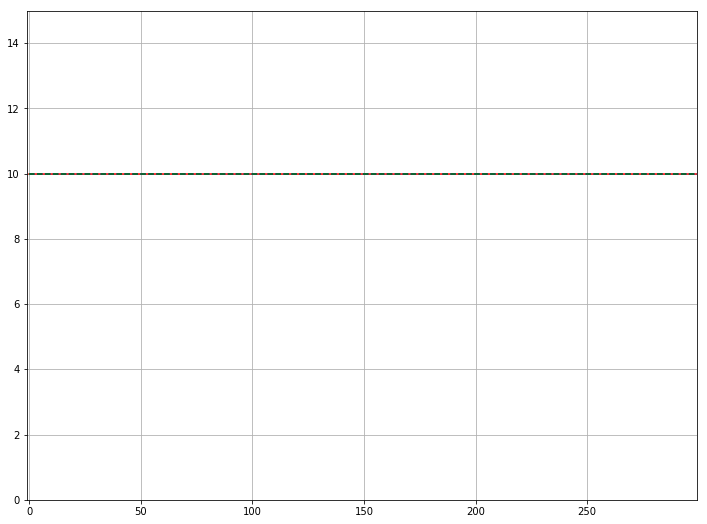

In [62]:
fig, ax = plt.subplots(figsize = (12, 9))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'b', linestyle = '--')
ln3, = plt.plot([], [], color = 'g', linestyle = '--')

frame_const = 2

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    ax.grid(True)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = A[frame_const*t]
    ln2.set_data(xdata, ydata2)
    ydata3 = B[frame_const*t]
    ln3.set_data(xdata, ydata3)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

# Нелинейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + \frac{\partial F}{\partial x} = 0, F = f^2/2 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [78]:
# def getPrecise_nelin(t):
#     v = dt*(f1+0)/2
#     res = np.zeros(N)
#     max_i = int(t*v/dx)+1
#     if max_i > N:
#         max_i = N
#     for i in range(max_i):
#         res[i] = f1
        
#     return res

In [72]:
f1 = 0.8

dx = 0.01
dt = 0.01

N = 300
T = 400

In [73]:
sigma = dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  1.0


### Схема "Явный левый уголок"

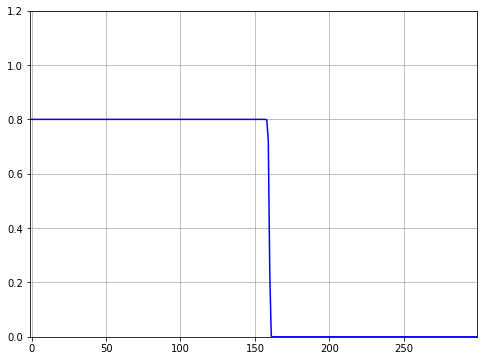

In [82]:
A = np.zeros((T,N))

for n in range(-1, T-1):
    A[n+1][0] = f1
    for i in range(1, N-1):
        A[n+1][i] = A[n][i] - sigma*(A[n][i]**2/2-A[n][i-1]**2/2)
    A[n+1][N-1] = A[n+1][N-2]


fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'b', linestyle = '-')

frame_const = 2

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    ax.grid(True)
    return ln,

def update(t):
    ydata = A[frame_const*t]
    ln.set_data(xdata, ydata)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, interval=20, init_func=init, blit=True)
HTML(anim.to_html5_video())

### ENO схема

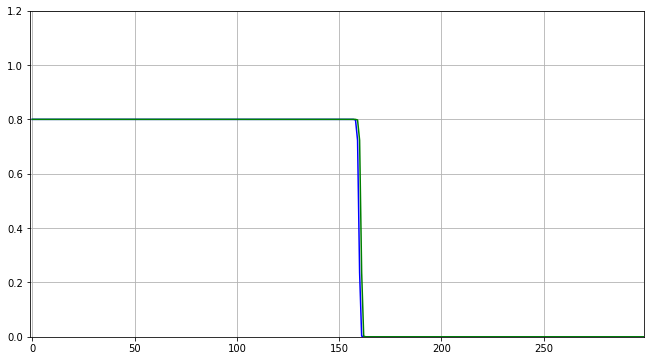

In [85]:
C = sigma

B = np.zeros((T,N))

def funcS(c, f1, f2):
    return 0.5*(1+c)*f1**2/2+0.5*(1-c)*f2**2/2


def funcN(c, f1, f2):
    return 0.5*(3-c)*f1**2/2-0.5*(1-c)*f2**2/2


for n in range(-1, T-1):
    B[n+1][0] = f1
    B[n+1][1] = f1
    for i in range(2, N-2):
        Ymm = abs(B[n][i-1]-B[n][i-2])
        Ym = abs(B[n][i]-B[n][i-1])
        Yp = abs(B[n][i+1]-B[n][i])
        Ypp = abs(B[n][i+2]-B[n][i+1])
        
        if a>0 and Yp>=Ym:
            fp = funcN(C, B[n][i], B[n][i-1])
            fn = funcN(C, B[n][i-1], B[n][i-2])
        elif a<0 and Ypp<=Yp:
            fp = funcN(C, B[n][i+1], B[n][i+2])
            fn = funcN(C, B[n][i], B[n][i+1])
        else:
            fp = funcS(C, B[n][i], B[n][i+1])
            fn = funcS(C, B[n][i-1], B[n][i])
            
        B[n+1][i] = B[n][i] - C*(fp-fn)
    B[n+1][N-2] = B[n+1][N-3]
    B[n+1][N-1] = B[n+1][N-2]
    

fig, ax = plt.subplots(figsize = (11, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'b', linestyle = '-')
ln2, = plt.plot([], [], color = 'g', linestyle = '-')

frame_const = 2

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    ax.grid(True)
    return ln,

def update(t):
    ydata = A[frame_const*t]
    ln.set_data(xdata, ydata)
    ydata2 = B[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, interval=20, init_func=init, blit=True)
HTML(anim.to_html5_video())